# <center><font color='red'>Projet Machine Learning</font></center>
## <center>Sujet: Utiliser l'apprentissage automatique pour traquer le coronavirus</center>

--------------------------------------------------------------------

### Importer les librairies et les données

In [1]:
import pandas as pd
import numpy as np

In [2]:
testing = pd.read_csv("testing.csv")
testing = testing.iloc[:, 1:]
testing.head(15)

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths
0,1/29/20,1,0,0,0
1,2/2/20,2,0,0,0
2,2/4/20,1,0,0,0
3,2/5/20,1,0,0,0
4,2/8/20,1,0,0,0
5,2/23/20,1,1,1,0
6,2/26/20,1,0,0,0
7,2/27/20,2,0,0,1
8,2/29/20,3,1,0,0
9,3/1/20,1,0,0,0


### Plot: Densité de l'observation du COVID-19

In [3]:
import matplotlib.pyplot as plt

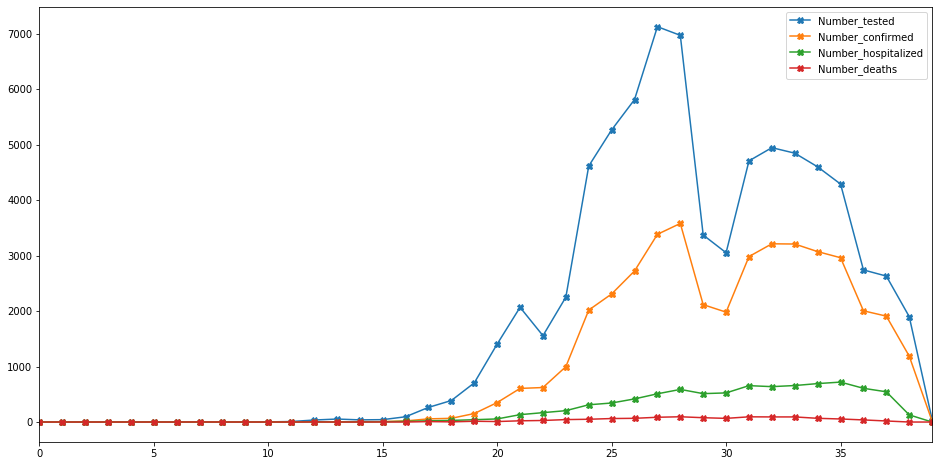

In [4]:
testing.plot(figsize=(16,8), marker="X")
plt.show()

### Introduire la distribution cumulative

In [5]:
testing['Number_confirmed_cum'] = np.cumsum(testing['Number_confirmed'])
testing['Number_tested_cum'] = np.cumsum(testing['Number_tested'])
testing['Number_hospitalized_cum'] = np.cumsum(testing['Number_hospitalized'])
testing['Number_deaths_cum'] = np.cumsum(testing['Number_deaths'])
testing.head()

,specimen_date,Number_tested,Number_confirmed,Number_hospitalized,Number_deaths,Number_confirmed_cum,Number_tested_cum,Number_hospitalized_cum,Number_deaths_cum
0,1/29/20,1,0,0,0,0,1,0,0
1,2/2/20,2,0,0,0,0,3,0,0
2,2/4/20,1,0,0,0,0,4,0,0
3,2/5/20,1,0,0,0,0,5,0,0
4,2/8/20,1,0,0,0,0,6,0,0


In [6]:
testing_cum = testing.iloc[:, 5:]
testing_cum.head()

,Number_confirmed_cum,Number_tested_cum,Number_hospitalized_cum,Number_deaths_cum
0,0,1,0,0
1,0,3,0,0
2,0,4,0,0
3,0,5,0,0
4,0,6,0,0


### Plot: Distribution

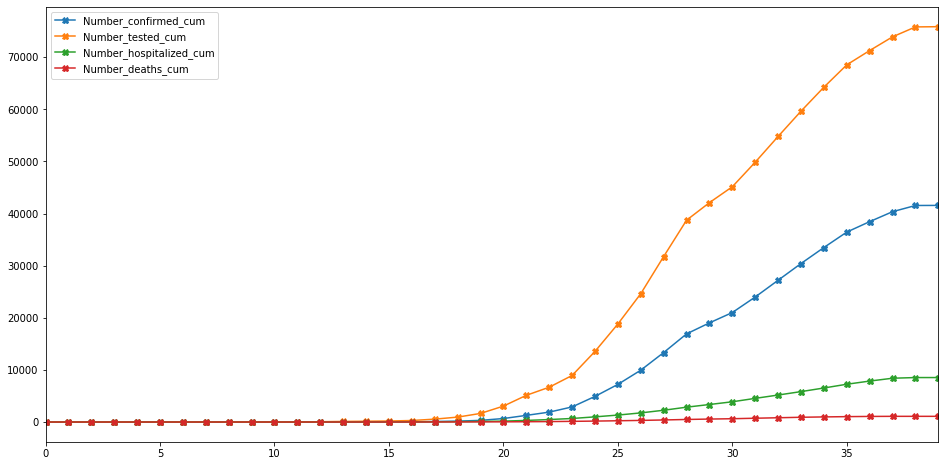

In [7]:
testing_cum.plot(figsize=(16,8), marker="X")
plt.show()

### Simple Linear Model: Build and Train

Nous allons construire un modèle linéaire:

$$y = \beta_1 \text{Number_tested} + \beta_2 \text{Number_confirmed} + \beta_3 \text{Number_hospitalized} + \beta_0$$

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X = testing.iloc[:, 1:4]
y = testing['Number_deaths']
X.shape, len(y)

((40, 3), 40)

In [10]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(lm.coef_, lm.intercept_)

[0.0080317  0.00485518 0.03472817] -0.36071664257027436


Résultats - Changement des coefficients:

$$y = 0.008 \cdot \text{Number_tested} + 0.005 \cdot \text{Number_confirmed} + 0.035 \cdot \text{Number_hospitalized} - 0.361$$

Comment évaluer la performance de ce modèle?

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum ( \hat{y} - y )^2 }$$

### Simple Linear Model: Performance

In [12]:
y_hat = np.dot(X, lm.coef_) + lm.intercept_

In [13]:
RMSE = np.round(np.sqrt(np.mean((y_hat - y)**2)), 3)
print('RMSE is', RMSE)

RMSE is 10.256


In [14]:
y_matrix = pd.DataFrame([y, y_hat], index = ['Number_deaths', 'Number_deaths_estimate_lm']).T
y_matrix.head(3)

,Number_deaths,Number_deaths_estimate_lm
0,0.0,-0.352685
1,0.0,-0.344653
2,0.0,-0.352685


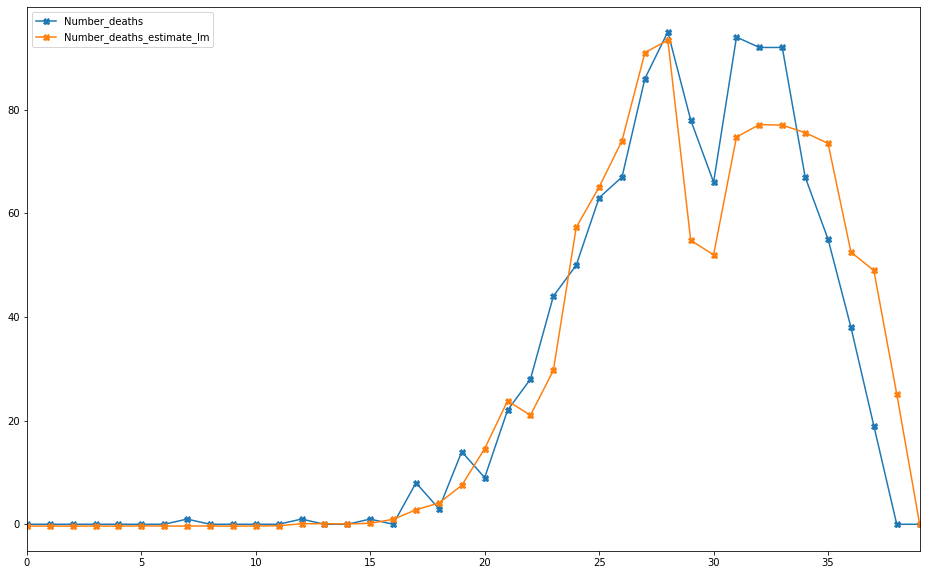

In [15]:
y_matrix.plot(figsize=(16,10), marker="X")
plt.show()

### Utiliser la régression linéaire pour faire la prédiction

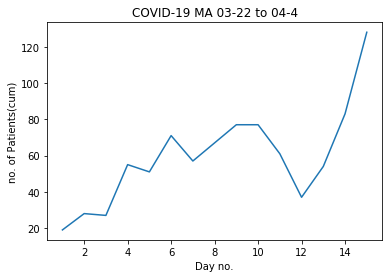

In [16]:
import pandas as pd
import numpy as np

dataset=pd.read_csv('COVID-19 MA 03-22 to 04-4.csv').values

data=dataset[:,0].reshape(-1,1)
target=dataset[:,1].reshape(-1,1)

from matplotlib import pyplot as plt

plt.plot(data,target)
plt.xlabel('Day no.')
plt.ylabel('no. of Patients(cum)')
plt.title('COVID-19 MA 03-22 to 04-4')
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=4,include_bias=False)
data_new=poly.fit_transform(data)

In [18]:
from sklearn.linear_model import LinearRegression

algorithm=LinearRegression()
algorithm.fit(data_new,target)

print('Coefficients:',algorithm.coef_)
print('Intercept:',algorithm.intercept_)

Coefficients: [[-29.46722489  12.47717424  -1.44352136   0.05119101]]
Intercept: [41.53594897]


$$y=-29.47x^{4}+12.48x^{3}-1.44x^{2}+0.051x+41.53594897$$

In [19]:
from sklearn.metrics import r2_score

predicted_target=algorithm.predict(data_new)

print('r2 score:',r2_score(target,predicted_target))

r2 score: 0.8974195900002259


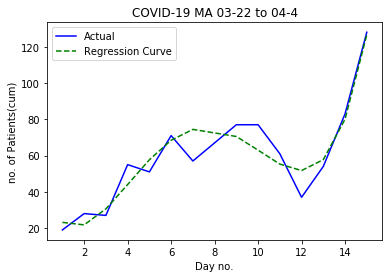

In [20]:
plt.plot(data,target,'b',label='Actual')
plt.plot(data,predicted_target,'g--',label='Regression Curve')
plt.legend()
plt.xlabel('Day no.')
plt.ylabel('no. of Patients(cum)')
plt.title('COVID-19 MA 03-22 to 04-4')
plt.show()

In [21]:
test_data=np.arange(13,24).reshape(-1,1)
test_data_new=poly.fit_transform(test_data)

In [22]:
predicted_target_next_10_days=algorithm.predict(test_data_new)

In [23]:
predicted_target_next_10_days

array([[  57.75458671],
       [  80.05232331],
       [ 126.55226079],
       [ 206.40774384],
       [ 330.0007015 ],
       [ 508.94164713],
       [ 756.06967843],
       [1085.45247742],
       [1512.3863105 ],
       [2053.39602835],
       [2726.23506604]])

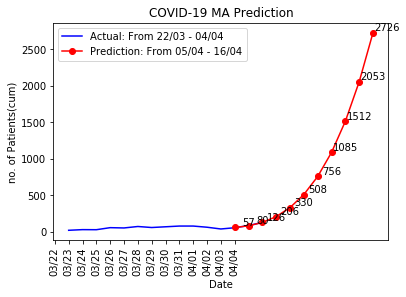

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

Dates=pd.date_range(start="2020-03-22",end="2020-04-04").strftime('%m/%d')

plt.plot(data,target,'b',label='Actual: From 22/03 - 04/04')
plt.plot(test_data,predicted_target_next_10_days,'r-o',label='Prediction: From 05/04 - 16/04')
plt.legend()
plt.xlabel('Date')
plt.ylabel('no. of Patients(cum)')
plt.xticks(range(0,len(Dates),1), Dates)
plt.xticks(rotation=90)
plt.title('COVID-19 MA Prediction')

for i, v in enumerate(predicted_target_next_10_days.reshape((predicted_target_next_10_days.shape[0]*predicted_target_next_10_days.shape[1]))):
    ax.text(i+14, v+25, "%d" %v, ha="center")

plt.savefig('Prediction.png')
plt.show()

### Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
DecTreeRegressor = DecisionTreeRegressor()
DecTreeRegressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [27]:
from sklearn.metrics import r2_score
y_hat_tree = DecTreeRegressor.predict(X)
score = r2_score(y_hat_tree, y)
RMSE = (score/X.shape[0]) ** 0.5
print('RMSE is', RMSE)

RMSE is 0.1581130346150576


In [28]:
y_matrix['Number_deaths_estimate_tree'] = y_hat_tree
df = pd.DataFrame({
    'x': range(1, X.shape[0]+1),
    'y1': y_matrix['Number_deaths'],
    'y2': y_matrix['Number_deaths_estimate_lm'],
    'y3': y_matrix['Number_deaths_estimate_tree'] })

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """


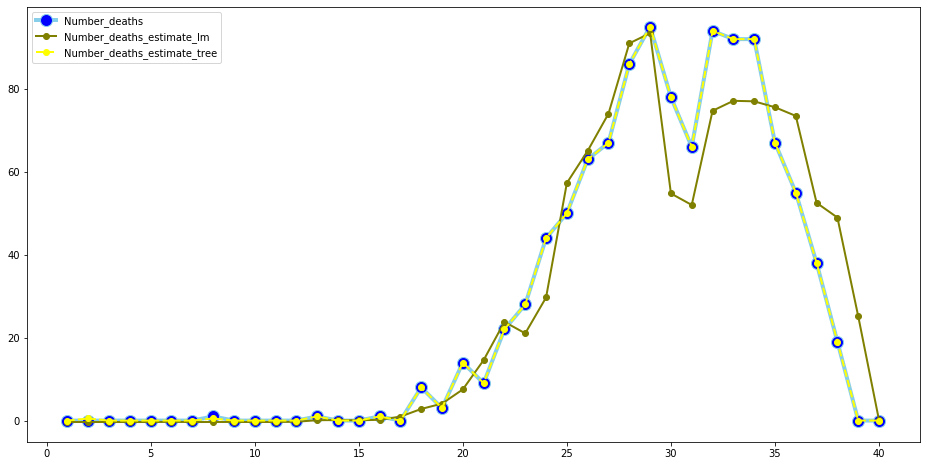

In [29]:
# multiple line plots
plt.figure(figsize=(16, 8))
plt.plot('x', 'y1', data=df, marker="o", markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label="Number_deaths")
plt.plot('x', 'y2', data=df, marker='o', color='olive', linewidth=2, label="Number_deaths_estimate_lm")
plt.plot( 'x', 'y3', data=df, marker='o', color='yellow', linewidth=2, linestyle='dashed', label="Number_deaths_estimate_tree")
plt.legend()
plt.show()

In [30]:
y_matrix

,Number_deaths,Number_deaths_estimate_lm,Number_deaths_estimate_tree
0,0.0,-0.352685,0.0
1,0.0,-0.344653,0.5
2,0.0,-0.352685,0.0
3,0.0,-0.352685,0.0
4,0.0,-0.352685,0.0
5,0.0,-0.313102,0.0
6,0.0,-0.352685,0.0
7,1.0,-0.344653,0.5
8,0.0,-0.331766,0.0
9,0.0,-0.352685,0.0


Investigation ends here.